### HOG and Raw Input Feature extraction using KNN classifier for digit classification dataset 

### Step 1: Import required packages

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature # This pacakge is used for LBP feature extraction
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import accuracy_score
%matplotlib inline
import cv2
from sklearn.preprocessing import scale
import seaborn as sns # This pacakge is used for better visualization of data (e.g confusion matrix)
# import Knn classifier
from sklearn.neighbors import KNeighborsClassifier
import pandas.util.testing as tm

### Mount the Google Drive to access the Digit MNIST Dataset

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


### Step 2: Data Set Preparation

In [0]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

**Utility function to load the data set into train and test**

In [0]:
X_train, y_train = load_mnist('/content/gdrive/My Drive/Assignment/Data/digit', kind='train')
X_test, y_test = load_mnist('/content/gdrive/My Drive/Assignment/Data/digit', kind='t10k')

print(np.shape(X_train))
print(np.shape(y_train))
print(np.shape(X_test))
print(np.shape(y_test))

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [0]:
#Normalisation and scaling

#Normalisation
X_train =X_train/255.0
X_test =X_test/255.0

#Scaling
X_train = scale(X_train)
X_test = scale (X_test)


### Step 3: Reshaping features for HOG feature Extraction

In [0]:
#Reshaping the Data to 28x28 for HOG Features 
X_train_R=X_train.reshape(-1,28,28)
X_test_R=X_test.reshape(-1,28,28)

# print the size of the result reshaped train and test data splits

print("Train dataset after reshaping:{}".format(np.shape(X_train_R)))
print("Test dataset after reshaping :{}".format(np.shape(X_test_R)))

Train dataset after reshaping:(60000, 28, 28)
Test dataset after reshaping :(10000, 28, 28)


[1]
[4]
[2]
[8]


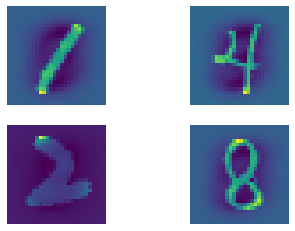

In [0]:
# Visualization of Sample images from Data set 

img_index = 23
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.axis('off')
ax1.imshow(X_train_R[img_index])
print([y_train[img_index]])

ax2 = fig.add_subplot(2,2,2)
ax2.axis('off')
img_index = 1098
ax2.imshow(X_train_R[img_index])
print([y_train[img_index]])

ax2 = fig.add_subplot(2,2,3)
ax2.axis('off')
img_index = 2075
ax2.imshow(X_train_R[img_index])
print([y_train[img_index]])

ax2 = fig.add_subplot(2,2,4)
ax2.axis('off')
img_index = 7908
ax2.imshow(X_train_R[img_index])
print([y_train[img_index]])

### Evaluating K values for the data set 

In [0]:
clf=KNeighborsClassifier(n_neighbors=3)

In [0]:
#Train set Accuracy: 0.97
clf.fit(X_train,y_train)
print("Train set Accuracy: {:.2f}".format(clf.score(X_train,y_train)))

Train set Accuracy: 0.97


In [0]:
clf=KNeighborsClassifier(n_neighbors=5)

In [0]:
#Train set Accuracy: 0.96
clf.fit(X_train,y_train)
print("Train set Accuracy: {:.2f}".format(clf.score(X_train,y_train)))

Train set Accuracy: 0.96


### Step 4: HOG Feature extraction

In [0]:
#HOG Feature extraction for Train Dataset

feature_vect_train=[]
label_train=[]
# loop over the training images
for img_index in range(len(X_train_R)):
  # load the image, and extract HOG features it
  img = X_train_R[img_index]
  f =  feature.hog(img, orientations=9, pixels_per_cell=(8,8), cells_per_block=(2,2), block_norm="L2-Hys")
  feature_vect_train.append(f)
  label_train.append(y_train[img_index])

print(np.shape(X_train_R))
print(np.shape(feature_vect_train))
print(np.shape(label_train))

(60000, 28, 28)
(60000, 144)
(60000,)


In [0]:
#HOG Feature extraction for Test Dataset
feature_vect_test=[]
label_test=[]
# loop over the training images
for img_index in range(len(X_test_R)):
  # load the image, and extract HOG features it
  img = X_test_R[img_index]
  f2 =  feature.hog(img, orientations=9, pixels_per_cell=(8,8), cells_per_block=(2,2), block_norm="L2-Hys")
  feature_vect_test.append(f2)
  label_test.append(y_test[img_index])

print(np.shape(X_test_R))
print(np.shape(feature_vect_test))
print(np.shape(label_test))

(10000, 28, 28)
(10000, 144)
(10000,)


### Step 5: Building model with passing training setdata and predicting accuracies

In [0]:

#Raw Input to KNN
clf_R=KNeighborsClassifier(n_neighbors=3)
clf_R.fit(X_train,y_train)
print("Train set Accuracy: {:.2f}".format(clf_R.score(X_train,y_train)))
y_pred_R = clf_R.predict(X_test)

accuracy_R = metrics.accuracy_score(y_test, y_pred_R)
print("Accuracy on the test dataset Raw Input:", accuracy_R *100)

#HOG Input to KNN
clf_HOG=KNeighborsClassifier(n_neighbors=3)
clf_HOG.fit(feature_vect_train,label_train)
print("Train set Accuracy: {:.2f}".format(clf_HOG.score(feature_vect_train,label_train)))
y_pred_HOG = clf_HOG.predict(feature_vect_test)

accuracy_HOG = metrics.accuracy_score(label_test, y_pred_HOG)
print("Accuracy on the test dataset HOG Input:", accuracy_HOG *100)

Train set Accuracy: 0.97
Accuracy on the test dataset Raw Input: 94.41000000000001
Train set Accuracy: 0.97
Accuracy on the test dataset HOG Input: 93.38


### Step 7:Plotting Confusion matrix for both Raw Input and HOG Input

[[ 964    1    1    2    0    6    5    1    0    0]
 [   0 1128    3    0    0    0    3    0    1    0]
 [  13    8  969   12    2    0    7   10    9    2]
 [   0    5    5  960    2   14    0   14    8    2]
 [   2    9    6    2  920    1    6    4    4   28]
 [   6    0    5   25    5  827   10    2    5    7]
 [  14    4    2    0    3    8  924    0    3    0]
 [   0   23   12    4    7    3    0  951    1   27]
 [  17    3   10   22   11   23    2    7  872    7]
 [   6    6    5   10   17    6    0   29    4  926]]


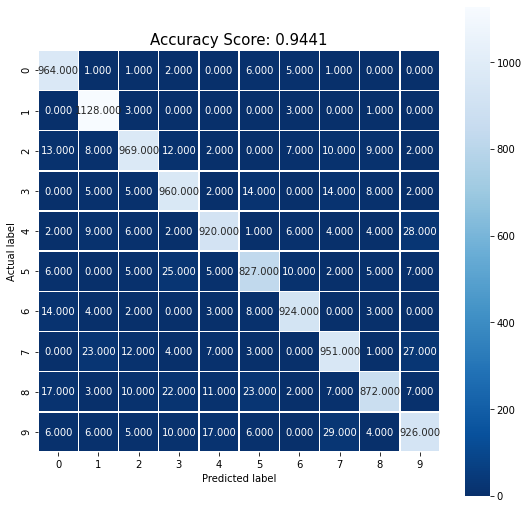

In [0]:
# confusion matrix for Raw Input

cm_R = metrics.confusion_matrix(y_test, y_pred_R)
print(cm_R)

# Ploting confusion matrix using seaborn library
plt.figure(figsize=(9,9))
sns.heatmap(cm_R, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_R)
plt.title(all_sample_title, size = 15);

[[ 967    3    0    0    0    0    8    0    1    1]
 [   0 1126    4    2    1    0    0    1    1    0]
 [   6    6  957   28    2    0    3   15    5   10]
 [   7    1   14  944    0   16    2    4    9   13]
 [  13   23    4    1  864    0   16   14    4   43]
 [   0    0    1   23    2  831    9    1   19    6]
 [  13    5    0    0    3    0  932    0    5    0]
 [   3   10   16    6   14    2    0  912    5   60]
 [  10    6    6   14    9    8    0    9  862   50]
 [   5    1    2    6   10    4    1   23   14  943]]


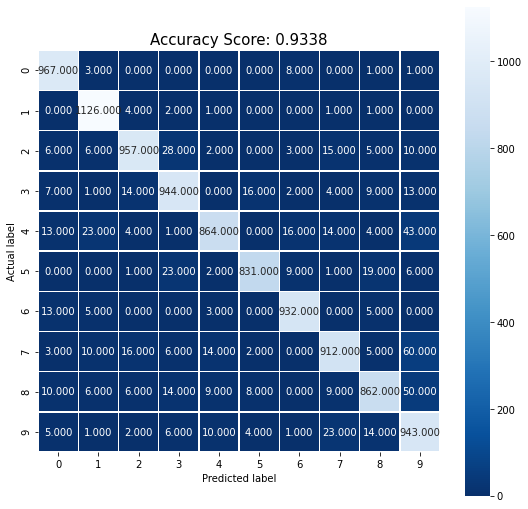

In [0]:
# confusion matrix for HOG Input

cm_HOG  = metrics.confusion_matrix(label_test, y_pred_HOG)
print(cm_HOG)

# Ploting confusion matrix using seaborn library
plt.figure(figsize=(9,9))
sns.heatmap(cm_HOG, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_HOG)
plt.title(all_sample_title, size = 15);
